## Projenin İçeriği
* **Proje Adı :** Computer Hardware
* **Proje İçeriği :** İşlemci markası, model adı, işlemci çevrim süresi, minimum ana bellek kapasitesi, maksimum ana bellek kapasitesi, önbellek boyutu, minimum kanal sayısı ve maksimum kanal sayısı özelliklerini kullanılarak yayınlanmış bağıl cpu performansı tespit edilmeye çalışılacaktır.

* **Not :** Veri setinde 10 adet özellik bulunmaktadır. 10. özelliğin (tahmin edilen bağıl cpu performansı) veri setinden çıkartılması istenmiştir bundan dolayı 10. özellik bu koda ve veri setine dahil edilmemiştir.
* Bu proje çoklu doğrusal algoritma kullanılarak yapılmıştır.

### Gerekli kütüphanelerin eklenmesi

In [5]:
# kütüphaneler eklenir
import pandas as pd # büyük veri kümeleri için kullanılır
import numpy as np # diziler, matrisler ve sayısal değerler ile çalışır
import matplotlib.pyplot as plt # veriyi görselleşitrmek için kullanılır
import statsmodels.api as sm # istatistiksel analiz ve modelleme sağlar.
from sklearn.linear_model import LinearRegression # çoklu doğrusal regresyon için kullanılır
from sklearn.model_selection import train_test_split # modeli test etmek için kullanılır
from sklearn.metrics import mean_squared_error, r2_score # hata oranını hesaplamak için kullanılır
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder # veri setinin ölçeklendirme yapabilmesini sağlar
from sklearn.compose import ColumnTransformer # farklı sütunlar üzerinde farklı ön işleme işlemleri yapar

### Veri setinin yüklenmesi ve sütunların adlarının belirlenmesi
* **Vendor_Name :** İşlemci markası
* **Model_Name :** Model adı
* **MYCT :** İşlemci çevrim süresi
* **MMIN :** Minimum ana bellek kapasitesi
* **MMAX :** Maksimum ana bellek kapasitesi
* **CACH :** Önbellek boyutu
* **CHMIN :** Minimum kanal sayısı
* **CHMAX :** Maksimum kanal sayısı
* **PRP :** Bağıl CPU performansı

In [7]:
# Veri setini yükleme
sutun_adlari = ['Vendor_Name', 'Model_Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP']
data = pd.read_csv('C:/Users/Cansu/OneDrive/Masaüstü/machine-learning-project/machine.data', names=sutun_adlari)
data.shape
print(data.head())

# data dataframe'e aktarılmıştır
df = pd.DataFrame(data)

# Eksik veri kontrolü ve temizleme
print("\nEksik Değerler:\n", data.isnull().sum())
data = data.dropna()  # Eksik verileri kaldırma

  Vendor_Name Model_Name  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP
0     adviser      32/60   125   256   6000   256     16    128  198
1      amdahl     470v/7    29  8000  32000    32      8     32  269
2      amdahl    470v/7a    29  8000  32000    32      8     32  220
3      amdahl    470v/7b    29  8000  32000    32      8     32  172
4      amdahl    470v/7c    29  8000  16000    32      8     16  132

Eksik Değerler:
 Vendor_Name    0
Model_Name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
dtype: int64


### Bağımlı değişkenin bağımsız değişkenlerden ayırma işlemi
* Bağımsız değişkenler girdi (x) olarak adlandırılır.
* Bağımlı değişken ise çıktı (y) olarak adlandırılır.
  
### Sayısal veriye dönüşüm ve Ölçeklendirme 
* Kategorik türde (object) verileri sayısal verilere dönüştürmemiz gerekiyor çünkü bu bir regresyon modellemedir. Regresyon sayısal veriler ile çalışır.
* MinMaxScaler : 0-1 arasında ölçeklendirme yapılmasını sağlar. "fit_transform" ile model parametreleri eğitilir. "transform" ile de bu parametreler kullanılarak veriye dönüştürülür.

In [100]:
# Kategorik verileri One-Hot Encoding ile dönüştürme
data_encoded = pd.get_dummies(data, columns=['Vendor_Name', 'Model_Name'], drop_first=True)

# Bağımlı değişkeni ayırma
y = data_encoded['PRP']
X = data_encoded.drop('PRP', axis=1) # axis = 1 satır demektir. O satırı çıkartması gerektiğini söylüyoruz. Artık o satır hariç 
# diğer satırları x temsil etmektedir

# Min-Max Scaler ile bağımsız değişkenleri ölçeklendirme
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Min-Max Scaler ile bağımlı değişkeni ölçeklendirme
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Ölçeklendirilmiş verileri DataFrame olarak oluşturma
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
y_scaled_df = pd.DataFrame(y_scaled, columns=['PRP'])

# Kontrol: İlk 5 satırı yazdırma
print("Bağımsız Değişkenler (X):\n", X_scaled_df.head())
print("Bağımlı Değişken (y):\n", y_scaled_df.head())

Bağımsız Değişkenler (X):
        MYCT      MMIN      MMAX   CACH     CHMIN     CHMAX  \
0  0.072825  0.006012  0.092843  1.000  0.307692  0.727273   
1  0.008092  0.248497  0.499499  0.125  0.153846  0.181818   
2  0.008092  0.248497  0.499499  0.125  0.153846  0.181818   
3  0.008092  0.248497  0.499499  0.125  0.153846  0.181818   
4  0.008092  0.248497  0.249249  0.125  0.153846  0.090909   

   Vendor_Name_amdahl  Vendor_Name_apollo  Vendor_Name_basf  Vendor_Name_bti  \
0                 0.0                 0.0               0.0              0.0   
1                 1.0                 0.0               0.0              0.0   
2                 1.0                 0.0               0.0              0.0   
3                 1.0                 0.0               0.0              0.0   
4                 1.0                 0.0               0.0              0.0   

   ...  Model_Name_v8635  Model_Name_v8650  Model_Name_v8655  \
0  ...               0.0               0.0             

### Veriyi eğitim ve test setlerine ayırma

209 veriye sahip olduğum için (orta büyüklükte eğitim seti) eğitim %70 test %30 verdim. Fakat elimdeki veri sayısı 1000 ve daha fazla olsaydı eğitim için daha fazla yüzdelik verirdim çünkü çok fazla veri var bunları eğitmesi gerekir.

* **X_train :** Girdilerin eğitim verileri
* **X_test :** Girdilerin test verileri
* **y_train :** Çıktının eğitim verisi
* **y_test :** Çıktının test verisi
* **test_size=0.2 :** Test için %20 kullanıldığını gösteriyor.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Eğitim çıktı verileri: \n",*y_train)
print("Test çıktı verileri: \n",*y_test)

Eğitim çıktı verileri: 
 214 465 1150 32 510 40 24 71 23 11 24 27 120 54 40 17 259 318 93 71 277 70 84 42 38 368 92 208 77 52 76 185 66 24 49 32 45 40 75 36 20 33 62 140 12 220 53 18 56 40 141 29 60 20 66 22 61 50 37 63 40 21 116 367 27 25 12 86 132 32 34 370 100 70 50 38 36 143 510 25 198 18 22 62 42 144 72 30 36 18 76 12 214 38 26 30 20 237 24 60 74 172 32 36 32 188 46 114 62 16 106 489 22 189 16 58 173 66 636 138 20 109 16 28 22 33 45 50 405 144 26 11 24 50 46 212 14 40 134 33 12 21 14 80 29 8 397 269 138 105 136 277 13 6 66 35 44 133 45 30 113 64 32 10 22 60 7
Test çıktı verileri: 
 274 30 22 915 16 326 72 6 1144 208 65 130 52 45 35 36 51 31 100 132 50 60 111 18 11 50 69 27 19 41 248 32 45 26 16 26 67 465 38 17 307 34


### Veri setinden özellik seçme
* Veri setinde hem sütun sayısı hem de satır sayısı fazla olduğu için ve karmaşıklık olmasın diye en iyi 10 özellik ile işlem yapmak istedim.

In [102]:
from sklearn.feature_selection import SelectKBest, f_regression # özellik seçimi yapmak için kullanılır. 

#SelectKBest, f_regression : Her bir özelliğin hedef değişkenle ilişkisi analiz edilmek için kullanılır.
# En iyi 10 özelliği seçme
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Seçilen özelliklerin adlarını alma
selected_features = X.columns[selector.get_support()]
print("Seçilen Özellikler:", selected_features)

Seçilen Özellikler: Index(['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'Vendor_Name_amdahl',
       'Model_Name_1100/94', 'Model_Name_580-5860', 'Model_Name_as/9060'],
      dtype='object')


### Çoklu doğrusal regresyon modelinin oluşumu

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Eğitim ve test verilerin histogram grafiği
* Grafik, eğitim ve test veri setlerindeki hedef değişkenin nasıl dağıldığını göstermek için oluşturulmuştur.

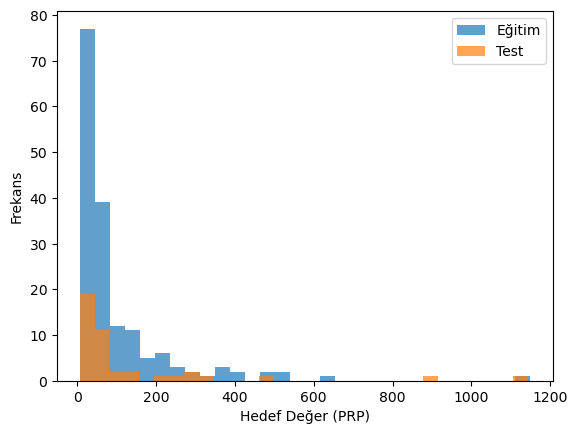

In [88]:
# Hedef değişkenin dağılımı
plt.hist(y_train, bins=30, alpha=0.7, label='Eğitim')
plt.hist(y_test, bins=30, alpha=0.7, label='Test')
plt.xlabel("Hedef Değer (PRP)")
plt.ylabel("Frekans")
plt.legend()
plt.show()

### Tahminlerin yapılması

In [67]:
# Eğitim ve test setlerini tahmin etme
E_Tahmin = model.predict(X_train)  # Eğitim seti tahminleri
T_Tahmin = model.predict(X_test)   # Test seti tahminleri

# Bağımlı değişkenin yeniden ölçeklendirilmesi için bağımlı scaler kullanımı
E_Tahmin_Gercek = scaler_y.inverse_transform(E_Tahmin.reshape(-1, 1))
T_Tahmin_Gercek = scaler_y.inverse_transform(T_Tahmin.reshape(-1, 1))

# Gerçek bağımlı değişken değerlerini yeniden ölçeklendirme
E_Gercek = scaler_y.inverse_transform(y_train.values.reshape(-1, 1))
T_Gercek = scaler_y.inverse_transform(y_test.values.reshape(-1, 1))

# Sonuçları yazdırma
print("Eğitim Seti Tahminleri (Orijinal Ölçek):\n", E_Tahmin_Gercek)
print("Test Seti Tahminleri (Orijinal Ölçek):\n", T_Tahmin_Gercek)

print(E_Tahmin.shape)  # Tahmin edilen eğitim seti boyutu
print(T_Tahmin.shape)  # Tahmin edilen test seti boyutu

# scaler_y'nin minimum ve maksimum değerlerini kontrol etme
print("Scaler Minimum Değeri:", scaler_y.data_min_)
print("Scaler Maksimum Değeri:", scaler_y.data_max_)


Eğitim Seti Tahminleri (Orijinal Ölçek):
 [[ 244822.        ]
 [ 531965.99999986]
 [1315606.00000013]
 [  36614.00000002]
 [ 583446.00000013]
 [  45765.99999988]
 [  27462.00000008]
 [  81229.99999998]
 [  26318.00000014]
 [  12590.00000001]
 [  27462.00000008]
 [  30894.00000013]
 [ 137286.00000019]
 [  61781.99999956]
 [  45766.00000001]
 [  19454.        ]
 [ 296302.00000027]
 [ 363798.00000014]
 [ 106398.00000005]
 [  81229.99999984]
 [ 316893.99999992]
 [  80085.99999977]
 [  96102.00000019]
 [  48053.99999968]
 [  43478.00000017]
 [ 420998.00000027]
 [ 105253.99999954]
 [ 237957.99999995]
 [  88094.00000012]
 [  59494.0000003 ]
 [  86950.00000005]
 [ 211645.99999995]
 [  75509.99999997]
 [  27461.99999977]
 [  56062.00000007]
 [  36614.00000016]
 [  51486.00000016]
 [  45766.0000003 ]
 [  85805.99999993]
 [  41190.00000018]
 [  22885.99999999]
 [  37758.00000012]
 [  70934.00000006]
 [ 160166.00000032]
 [  13733.9999999 ]
 [ 251686.00000009]
 [  60638.00000015]
 [  20598.00000015

### Gerçek ve tahmin değerlerinin eğitim ve test verileri üzerindeki performans grafiği

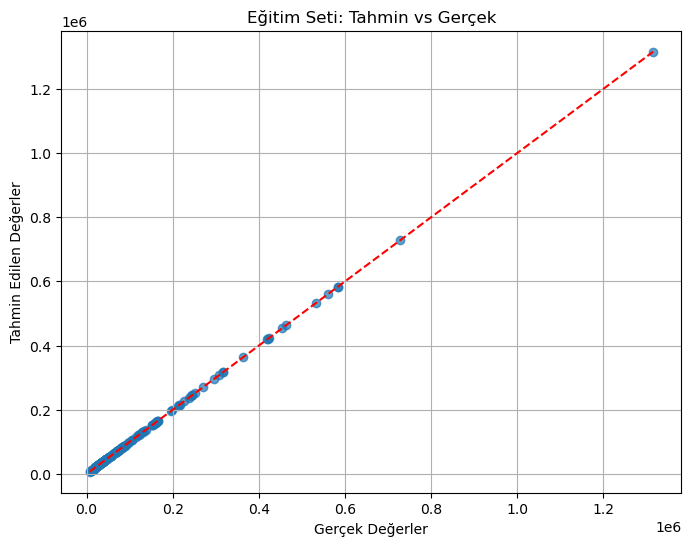

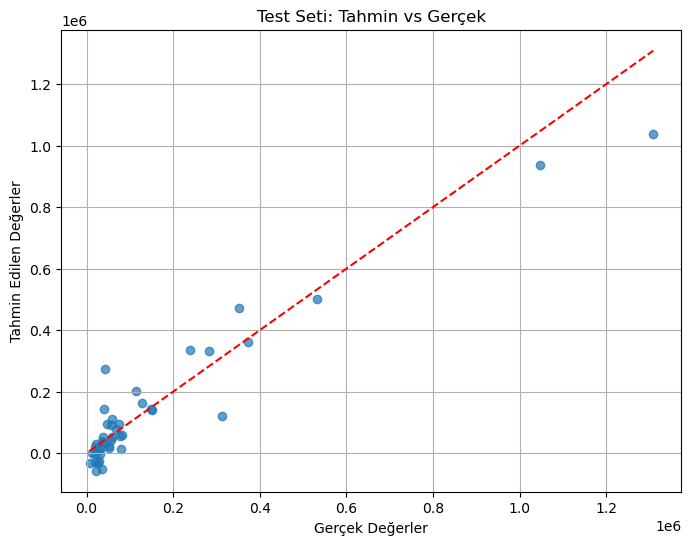

In [69]:
def plot_tahmin_vs_gercek(y_gercek, y_tahmin, baslik="Tahmin vs Gerçek"):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_gercek, y_tahmin, alpha=0.7)
    plt.plot([y_gercek.min(), y_gercek.max()], [y_gercek.min(), y_gercek.max()], 'r--')
    plt.xlabel("Gerçek Değerler")
    plt.ylabel("Tahmin Edilen Değerler")
    plt.title(baslik)
    plt.grid()
    plt.show()

# Eğitim ve test setleri için grafikleri çizdirme
plot_tahmin_vs_gercek(E_Gercek, E_Tahmin_Gercek, "Eğitim Seti: Tahmin vs Gerçek")
plot_tahmin_vs_gercek(T_Gercek, T_Tahmin_Gercek, "Test Seti: Tahmin vs Gerçek")


### Aşırı öğrenmeyi azaltma
* Ridge Regresyon, çoklu doğrusal regresyonun bir türüdür ve aşırı öğrenmeyi azaltmayı hedefler.

In [95]:
from sklearn.linear_model import Ridge # modeli içe aktarmak için kullanılır.
# Ridge regresyon modeli
ridge_model = Ridge(alpha=1.0) # nesne ouşturulur
ridge_model.fit(X_train, y_train) # eğitim verileri üzerinde eğitilir

# Tahminler ve performans değerlendirmesi
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)

### ÇDR formülünün oluşturulması

In [33]:
# Katsayıları mutlak değerine göre sıralama
sorted_coefficients = sorted(zip(X.columns, model.coef_), key=lambda x: abs(x[1]), reverse=True)

# En önemli 10 değişkeni seçme
top_features = sorted_coefficients[:10]

# Kesme Noktası (Intercept)
print("Kesme Noktası (b_0): {:.4f}".format(model.intercept_))

# Seçilen değişkenlerin katsayılarını yazdırma
for idx, (feature, coef) in enumerate(top_features):
    print("Bağımsız Değişken b_{}({}): {:.4f}".format(idx + 1, feature, coef))

# Basitleştirilmiş matematiksel formülü oluşturma
formula = "Y = {:.4f}".format(model.intercept_)
for idx, (feature, coef) in enumerate(top_features):
    formula += " + ({:.4f})*{}".format(coef, feature)

print("\nBasitleştirilmiş Çoklu Doğrusal Regresyon Formülü:")
print(formula)


Kesme Noktası (b_0): -58.9066
Bağımsız Değişken b_1(Model_Name_1100/94): 317.3754
Bağımsız Değişken b_2(Model_Name_cyber:170/760): 262.2084
Bağımsız Değişken b_3(Model_Name_32/60): -136.7740
Bağımsız Değişken b_4(Model_Name_1100/81): -127.5115
Bağımsız Değişken b_5(Model_Name_v8665): -123.7979
Bağımsız Değişken b_6(Model_Name_cyber:170/835): -112.9275
Bağımsız Değişken b_7(Model_Name_470v/7b): -98.8659
Bağımsız Değişken b_8(Model_Name_dps:8/52): -96.2664
Bağımsız Değişken b_9(Model_Name_seq.ms/3200): -92.0407
Bağımsız Değişken b_10(Vendor_Name_microdata): -92.0407

Basitleştirilmiş Çoklu Doğrusal Regresyon Formülü:
Y = -58.9066 + (317.3754)*Model_Name_1100/94 + (262.2084)*Model_Name_cyber:170/760 + (-136.7740)*Model_Name_32/60 + (-127.5115)*Model_Name_1100/81 + (-123.7979)*Model_Name_v8665 + (-112.9275)*Model_Name_cyber:170/835 + (-98.8659)*Model_Name_470v/7b + (-96.2664)*Model_Name_dps:8/52 + (-92.0407)*Model_Name_seq.ms/3200 + (-92.0407)*Vendor_Name_microdata


### Model performasının değerlendirilmesi

In [73]:
# Eğitim ve test R^2 ve MSE değerlerini hesaplama
egitim_r2 = r2_score(E_Gercek, E_Tahmin_Gercek)
egitim_mse = mean_squared_error(E_Gercek, E_Tahmin_Gercek)
test_r2 = r2_score(T_Gercek, T_Tahmin_Gercek)
test_mse = mean_squared_error(T_Gercek, T_Tahmin_Gercek)

# Sonuçları yazdırma
print(f"Eğitim seti R^2: {egitim_r2:.2f}")
print(f"Eğitim seti MSE: {egitim_mse:.2f}")
print("-" * 20)
print(f"Test seti R^2: {test_r2:.2f}")
print(f"Test seti MSE: {test_mse:.2f}")

Eğitim seti R^2: 1.00
Eğitim seti MSE: 0.00
--------------------
Test seti R^2: 0.91
Test seti MSE: 6315605286.16


### Tahmin edilen değerler ile gerçek değerler arasındaki ilişkiyi görselleştirme
* plot_tahmin_vs_gercek : fonksiyon tanımı
* y_gercek : gerçek değer
* y_tahmin : tahmin değeri
* baslik : grafiğin başlığı
* plt.figure(figsize=(8, 6)) : garfiğin boyutu ayarlanır
* alpha=0.7 : noktaların şeffaflık düzeyi
* color='b' : noktaları mavi renk çizer
* label='Tahminler' : mavi ile gösterilen değer tahminler adını alır
* 'r--' : kırmızı kesik çizgiler çizer
* y : x doğrusu çizer

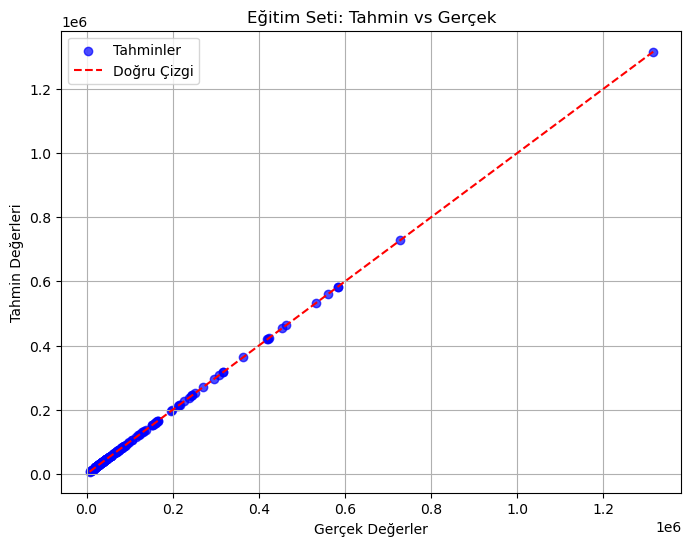

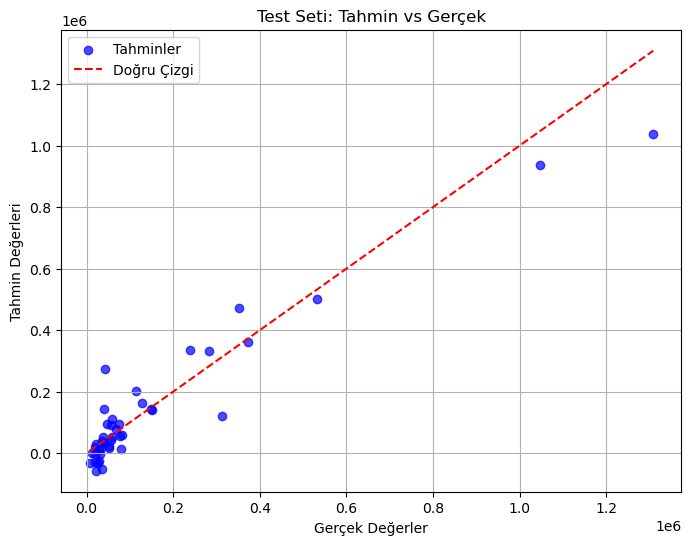

In [75]:
def plot_tahmin_vs_gercek(y_gercek, y_tahmin, baslik="Tahmin vs Gerçek"):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_gercek, y_tahmin, alpha=0.7, color='b', label='Tahminler')
    plt.plot([y_gercek.min(), y_gercek.max()], [y_gercek.min(), y_gercek.max()], 'r--', label='Doğru Çizgi')
    plt.xlabel("Gerçek Değerler")
    plt.ylabel("Tahmin Değerleri")
    plt.title(baslik)
    plt.legend()
    plt.grid()
    plt.show()

# Eğitim seti için
plot_tahmin_vs_gercek(E_Gercek, E_Tahmin_Gercek, "Eğitim Seti: Tahmin vs Gerçek")

# Test seti için
plot_tahmin_vs_gercek(T_Gercek, T_Tahmin_Gercek, "Test Seti: Tahmin vs Gerçek")


### Tahmin edilen değerler ile gerçek değerler arasındaki ilişkiyi çizgi grafiği ile görselleştirme

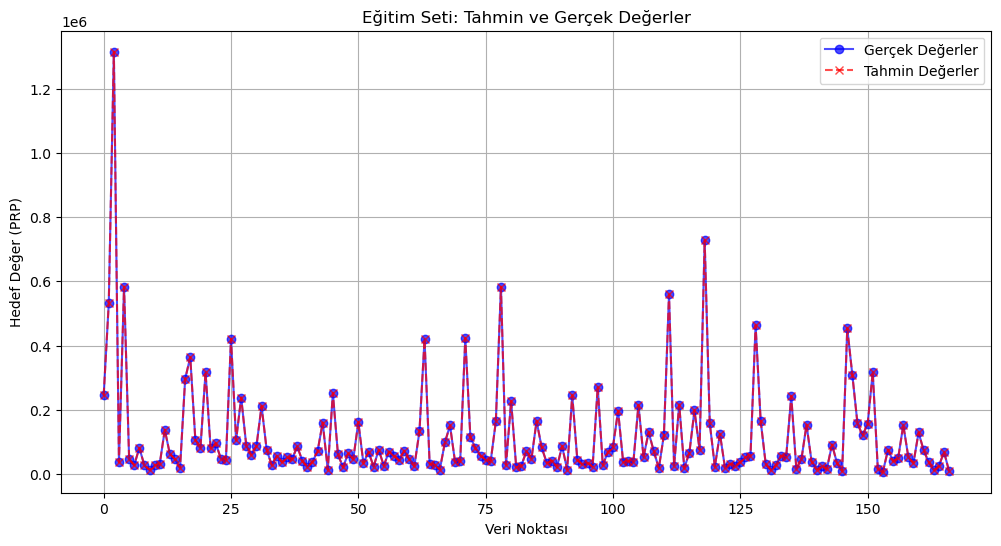

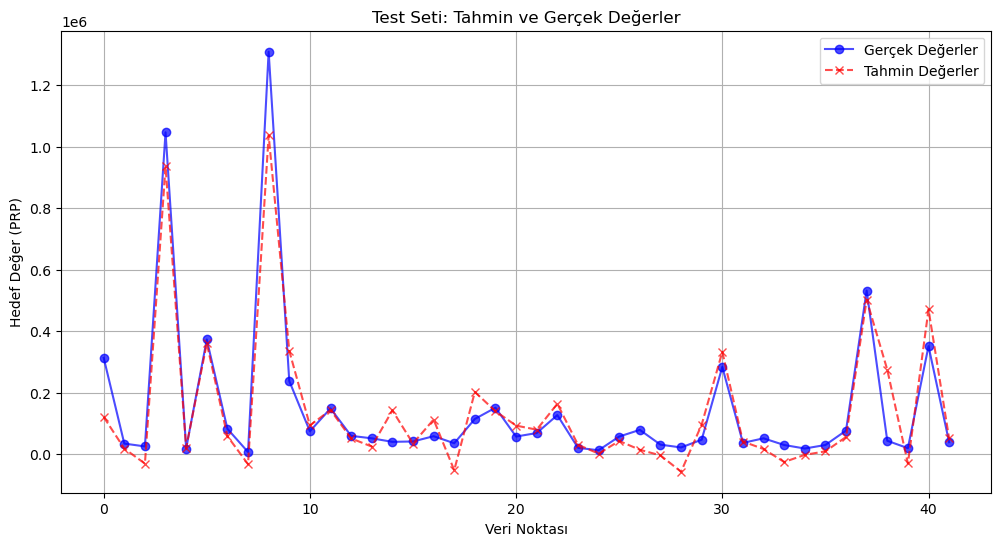

In [77]:
def plot_cizgi_grafik(y_gercek, y_tahmin, baslik="Tahmin ve Gerçek Değerler"):
    plt.figure(figsize=(12, 6))
    plt.plot(y_gercek, label='Gerçek Değerler', color='b', marker='o', linestyle='-', alpha=0.7)
    plt.plot(y_tahmin, label='Tahmin Değerler', color='r', marker='x', linestyle='--', alpha=0.7)
    plt.title(baslik)
    plt.xlabel("Veri Noktası")
    plt.ylabel("Hedef Değer (PRP)")
    plt.legend()
    plt.grid()
    plt.show()

# Eğitim seti için
plot_cizgi_grafik(E_Gercek.flatten(), E_Tahmin_Gercek.flatten(), "Eğitim Seti: Tahmin ve Gerçek Değerler")

# Test seti için
plot_cizgi_grafik(T_Gercek.flatten(), T_Tahmin_Gercek.flatten(), "Test Seti: Tahmin ve Gerçek Değerler")